# Sample use of the Aware python modules

SI provided with the paper "Quantifying uncertainty for AWARE characterization factors"

**Paper authors:**
  - Anne-Marie Boulay (1, 2)
  - Pascal Lesage (1) 
  - Stephan Pfister* (3)
  - Ben Amor (2)

**Code and notebook author:**
  - Pascal Lesage** (1) 

1: CIRAIG, Polytechnique Montreal, Canada  
2: LIRIDE, Sherbrooke University, Canada  
3: ETH Zurich, Switzerland

\* Corresponding author for paper (stephan.pfister@ifu.baug.ethz.ch)  
\** Corresponding author for code and notebook (pascal.lesage@polymtl.ca)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective-of-this-Notebook" data-toc-modified-id="Objective-of-this-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective of this Notebook</a></span></li><li><span><a href="#The-AWARE-model" data-toc-modified-id="The-AWARE-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The AWARE model</a></span></li><li><span><a href="#AwareStatic-module" data-toc-modified-id="AwareStatic-module-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AwareStatic module</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Input-parameters" data-toc-modified-id="Input-parameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Input parameters</a></span></li><li><span><a href="#Using-AwareStatic" data-toc-modified-id="Using-AwareStatic-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Using AwareStatic</a></span></li></ul></li><li><span><a href="#AwareStochastic" data-toc-modified-id="AwareStochastic-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AwareStochastic</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Using-AwareStochastic" data-toc-modified-id="Using-AwareStochastic-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using AwareStochastic</a></span></li></ul></li><li><span><a href="#AwareAnalyser" data-toc-modified-id="AwareAnalyser-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>AwareAnalyser</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Sample-use-of-the-AwareAnalyser-methods" data-toc-modified-id="Sample-use-of-the-AwareAnalyser-methods-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sample use of the AwareAnalyser methods</a></span><ul class="toc-item"><li><span><a href="#Instantiating-the-AwareAnalyser-object" data-toc-modified-id="Instantiating-the-AwareAnalyser-object-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Instantiating the AwareAnalyser object</a></span></li><li><span><a href="#Graphing-results-for-a-watershed-month" data-toc-modified-id="Graphing-results-for-a-watershed-month-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Graphing results for a watershed-month</a></span></li><li><span><a href="#Getting-some-stats" data-toc-modified-id="Getting-some-stats-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Getting some stats</a></span></li></ul></li></ul></li></ul></div>

## Objective of this Notebook

An "Aware" module, with three classes (AwareStatic, AwareStochastic, AwareAnalysis) were coded to easily:

  - Import and transform in put parameter data to the Aware model  
  - Carry out calculations of characterization factors  
  - Carry out Monte Carlo simulations to produce arrays of characterization factors  
  - Retrieve results  
  - Carry out analyses  
  
The code can be downloaded [here](https://github.com/PascalLesage/aware)  

To install and use the package, you must:  
  - Download the package [here](XXX)  
  - [Install python](https://www.python.org/downloads/). 
  - Via your command line, navigate to the directory where the package was downloaded  
  - Type `python setup aware_cf_calculator`  
  
To use the package, follow the instructions in this notebook.  

## The AWARE model

AWARE is a consensus-based method development to assess water use in LCA. It was developed by the [WULCA UNEP/SETAC working group](http://www.wulca-waterlca.org/index.html). Its characterization factors represent the relative Available WAter REmaining per area in a watershed, after the demand of humans and aquatic ecosystems has been met. It assesses the potential of water deprivation, to either humans or ecosystems, building on the assumption that the less water remaining available per area, the more likely another user will be deprived 

For information on the actual Aware model, please refer to the [dedicated website](http://www.wulca-waterlca.org/aware.html) and to the paper for which this notebook is a supplementary information.  

## AwareStatic module

### Objective

The objective of the AwareStatic module is to:  
  - import independent parameter values from a formatted Excel file (supplied in the package directory as "AWARE_base_data.xlsx")  
  - calculate characterization factors for all covered watersheds, both at the monthly level and for three types of annual averages: agricultural use, non-agricultural use, and unspecified use (sometimes refered to as "unknown use")  
  - output the resulting characterization factors to files. 

### Input parameters

The independent input parameters to the AWARE model are the following:  

        Monthly irrigation
            Description: irrigation water, per month, per watershed
            Unit: m3/month
            Location in Excel file: Irrigation
            File name once imported: irrigation.pickle
            table shape: (11050, 12)

        Non-irrigation hwc: electricity, domestic, livestock, manufacturing
            Description: non-irrigation uses of water
            Unit: m3/year
            Location in Excel file: hwc_non_irrigation
            File name once imported: electricity.pickle, domestic.pickle,
                livestock.pickle, manufacturing.pickle
            table shape: 3 x (11050,)

        avail_delta
            Description: Difference between "pristine" natural availability
                reported in PastorXNatAvail and natural availability calculated
                from "Actual availability as received from WaterGap - after
                human consumption" (Avail!W:AH) plus HWC.
                This should be added to calculated water availability to
                get the water availability used for the calculation of EWR
            Unit: m3/month
            Location in Excel file: avail_delta
            File name once imported: avail_delta.pickle
            table shape: (11050, 12)

        avail_net
            Description: Actual availability as received from WaterGap - after human consumption
            Unit: m3/month
            Location in Excel file: avail_net
            File name once imported: avail_net.pickle
            table shape: (11050, 12)

        pastor
            Description: fraction of PRISTINE water availability that should be reserved for environment
            Unit: unitless
            Location in Excel file: pastor
            File name once imported: pastor.pickle
            table shape: (11050, 12)

        area
            Description: area
            Unit: m2
            Location in Excel file: area
            File name once imported: area.pickle
            table shape: (11050,)


The Excel file also contains a "filters" sheet which identify watersheds that are excluded from calculations. two such filters exist:  
  - Polar filter, which excludes cells from Greenland  
  - Pastor filter, which excludes watersheds without data from the Pastor et al. (2014) method (122 cells), representing small coastal cells with no direct overlap  

### Using AwareStatic

Import the AwareStatic module

In [1]:
from aware_cf_calculator import AwareStatic

Determine (1) where you want results to be stored and (2) where the Excel file with input parameters is found.

In [2]:
from pathlib import Path
dirpath_for_results = Path(r"F:/AwareSampleUse")
input_data_filepath = Path(r"../data/AWARE_base_data.xlsx") 
# Note: the excel file does not need to be in the same directory as results.

Create an AwareStatic object: 

In [3]:
aware_static = AwareStatic(
    base_dir_path=dirpath_for_results,
    raw_data_fp=input_data_filepath,
)

Data needs to be imported.

Extracting data from Excel...
...area
...avail_delta
...avail_net
...domestic
...electricity
...irrigation
...livestock
...manufacturing
...pastor
...uncertainty
...filters
...model_uncertainty

Filtering out unwanted basins
...area
	 shape changed from (11050, 1) to (9707, 1)
...avail_delta
	 shape changed from (11050, 12) to (9707, 12)
...avail_net
	 shape changed from (11050, 12) to (9707, 12)
...domestic
	 shape changed from (11050, 1) to (9707, 1)
...electricity
	 shape changed from (11050, 1) to (9707, 1)
...irrigation
	 shape changed from (11050, 12) to (9707, 12)
...livestock
	 shape changed from (11050, 1) to (9707, 1)
...manufacturing
	 shape changed from (11050, 1) to (9707, 1)
...pastor
	 shape changed from (11050, 12) to (9707, 12)
...uncertainty
	 shape changed from (11050, 7) to (9707, 7)
...model_uncertainty
	 shape changed from (11050, 12) to (9707, 12)
No results were calculated, calculate using `det_calcs` method


This simply extracts the data from the Excel file and applies the Polar and Pastor filters.  

To actually calculate the characterization factors, one needs to run the `det_calcs` method.

In [4]:
aware_static.det_calcs(
    lower_bound=0.1, # default lower bound in CF calculation, see documentation on AWARE
    upper_bound=100, # default upper bound in CF calculation, see documentation on AWARE,
    dump_excel=True, # save Excel files with results
    dump_pickle=True # save pandas dataframes with results
)

This generated Excel files and pandas DataFrames with : 
  - values for all calculated (intermediate) parameters (e.g. Environmental Water Requirement EWR, Human Water Consumption HWC, etc.).  
  - characterization factors (monthly, and three types of annual averages, per watershed)  
  
These are found in the static_results subdirectory.

Results can also be querried directly. Results are stored in the `aware_static.det_results` attribute, which is a dictionary with values = pandas dataframes and keys = parameters or cfs. The valid keys are:

In [5]:
list(aware_static.det_results.keys())

['HWC',
 'avail_before_human_consumption',
 'pristine',
 'EWR',
 'total_AMD',
 'AMD_per_m2',
 'yearly_AMD_per_m2',
 'AMD_world',
 'AMD_world_over_AMD_i',
 'cfs_monthly',
 'cfs_average_unknown',
 'cfs_average_agri',
 'cfs_average_non_agri']

The syntax for getting results is: 

In [6]:
# HWC results for 5 random watersheds, per month
aware_static.det_results['HWC'].sample(n=5)

,jan,feb,mar,apr,may,jui,jul,aug,sep,oct,nov,dec
BAS34S_ID,,,,,,,,,,,,
57463,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
29676,280898.916667,280898.916667,280898.916667,281410.916667,305815.916667,335531.916667,343819.916667,332456.916667,293201.916667,280898.916667,280898.916667,280898.916667
6598,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667,6.416667
66802,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333,3210.833333
39041,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000,110901.250000


In [7]:
# CF value for watershed 59993, month=January
aware_static.det_results['cfs_monthly'].loc[59993, 'jan']

0.13414225429829035

In [8]:
# Annual average CF (agricultural use) for watershed 41064
aware_static.det_results['cfs_average_agri'].loc[59993]

0.18919279623174604

## AwareStochastic

### Objective

The AwareStochastic is used to carry out Monte Carlo simulations to produce sets of random CFs. It first generates random samples for all input random variables, and then uses these to calculate CFs. 

### Using AwareStochastic

In [9]:
from aware_cf_calculator import AwareStochastic

In [11]:
aware_stochastic = AwareStochastic(
    base_dir_path=dirpath_for_results,
    sim_name='demo',     # Name of the simulation - many simulations can be carried out with different parameters
    consider_certain=[], # Names of parameters to hold static, default is empty list
    caps={'model_uncertainty': 17.4}, # Superior cap for k value for model uncertainty
    iterations=50, # Number of iterations for the simulation, small number for this demo,
    dtype="float64"
)

Data already imported
Non-CF results already calculated
CFs available for ['cfs_0_1_100']
---checking samples for avail_delta_wo_model_uncertainty
Samples need to be generated.
	50 samples taken for avail_delta_wo_model_uncertainty
	50 samples taken for avail_net_wo_model_uncertainty
	50 samples taken for domestic
	50 samples taken for electricity
	50 samples taken for irrigation
	50 samples taken for livestock
	50 samples taken for manufacturing
	50 samples taken for pastor
	50 samples taken for model_uncertainty
Adding model uncertainty


From these sampled data, AwareStichastic calculates AMD results (one per iteration)

In [12]:
aware_stochastic.calculate_AMD_samples()

ready to start with HWC, 0 of 50 already calculated


The AMD results (and intermediate variables such as HWC) are stored "one file per iteration, multiple watersheds". The method `aggregate_results` flips this, saving results "one file per watershed" (or watershed-month), with all samples stored in the same order in each file.

In [13]:
aware_stochastic.aggregate_results()

116484 to treat for HWC
Aggregating AMD_world
116484 to treat for AMD_world_over_AMD_i
116484 to treat for irrigation


Next is the actual calculation of CFs. This can be done for different cut-off values (default is 0.1 and 100 for lower and upper bound on the AMD_world/AMD ratio).

In [14]:
aware_stochastic.calculate_all_single_month_cfs_stochastic(lower_bound=0.1, upper_bound=100)

In [15]:
aware_stochastic.calculate_cfs_average(lower_bound=0.1, upper_bound=100)

Will generate average cfs for 9707 basins


The resulting numpy arrays are stored in the directory `AwareSampleUse/stochastic_results/demo/cfs/0_1_100`  
The numpy arrays can be converted to the more well-known `csv` format:

In [16]:
aware_stochastic.convert_dfs_to_csv(lower_bound=0.1, upper_bound=100)

## AwareAnalyser

### Objective

The AwareAnalyser module has an ad hoc suite of methods that allow an analysis of results.  
Some of these methods were used in the analyses in the paper.  
It is beyond the scope of this notebook to go into detail in all the types of analyses, but the reader is invited to get to know them and expand upon them.  
A sample use of the module is presented below.

### Sample use of the AwareAnalyser methods

#### Instantiating the AwareAnalyser object

In [17]:
from aware_cf_calculator import AwareAnalyser

In [18]:
aware_analyser = AwareAnalyser(base_dir_path=dirpath_for_results, sim_name="demo")

Data already imported
Non-CF results already calculated
CFs available for ['cfs_0_1_100']
---checking samples for avail_delta_wo_model_uncertainty
---checking samples for avail_net_wo_model_uncertainty
---checking samples for domestic
---checking samples for electricity
---checking samples for irrigation
---checking samples for livestock
---checking samples for manufacturing
---checking samples for pastor
---checking samples for model_uncertainty
---checking samples for avail_net
---checking samples for avail_delta
Samples already exist.


#### Graphing results for a watershed-month

Sample method: plot histograms for key parameters and cfs for a given watershed/month  
Note that the results are for 50 iterations only, which of course is not really sufficient to produce smooth distributions.

In [19]:
%matplotlib inline

Could not get electricity for basin 59993 and month jan


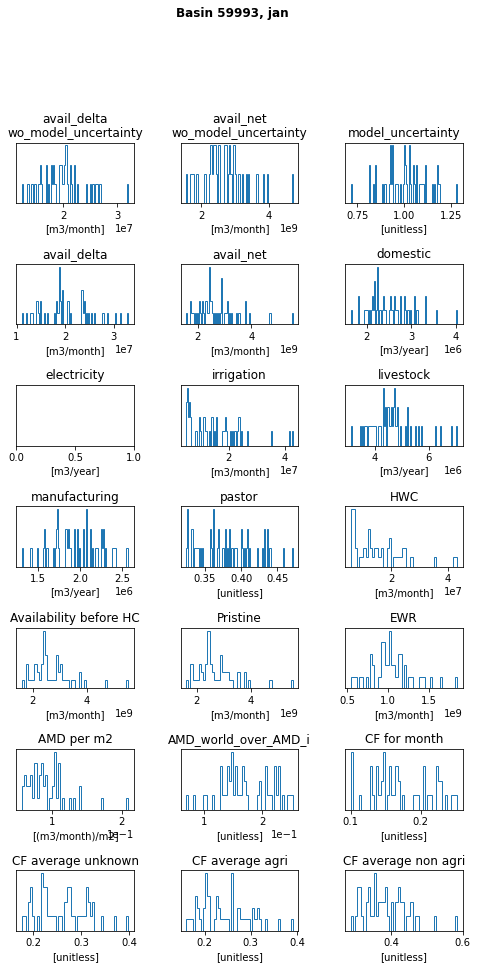

In [20]:
aware_analyser.plot_all_hists_given_basin_and_month(
    basin=59993,
    month='jan',
    lower_bound=0.1,
    upper_bound=100,
    return_graph=True,
    save_graph=False
);

#### Getting some stats

In [21]:
# Let's get a random list of 10 watersheds
import random
random_watersheds = random.sample(aware_analyser.basins, 10)

# And then let's generate some statistics for the months of January and July for these months
cf_stats = aware_analyser.get_full_stats(
    result_type='monthly_cf_all', # type aware_analyser.valid_result_types for a list of all result types
    basins=random_watersheds,     # use 'all' to generate stats for all watersheds. Be ready to wait a while...
    months=['jan', 'jul'],         # use 'all' to generate stats for all months
    lower_bound=0.1, upper_bound=100,
    aggregate_by_static=False, 
    augment_with_dispersion=True,
    iterations_limiter=None
)

Looking into months: ['jan', 'jul']


0% [####################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [22]:
cf_stats

,2.5%ile,Q1,Q3,97.5%ile,sd,mean,median,BAS34S_ID,month,static,IQR,IQR/static,IPR-95%,IPR-95%/static,sd/static
0,0.859964,1.573880,2.741754,3.823516,0.892287,2.194213,1.990094,16140.0,jan,1.411446,1.167874,0.827431,2.963552,2.099657,0.632180
1,0.663582,1.099955,3.307714,10.322773,2.586210,2.761405,1.676544,16140.0,jul,1.323401,2.207760,1.668247,9.659191,7.298763,1.954215
2,1.841079,12.695815,100.000000,100.000000,39.479187,44.612774,21.646786,2791.0,jan,17.549826,87.304185,4.974647,98.158921,5.593156,2.249549
3,0.288364,0.487077,0.794155,1.115489,0.230826,0.650672,0.617491,2791.0,jul,0.477694,0.307078,0.642834,0.827125,1.731495,0.483209
4,1.553284,3.052101,5.870340,12.593530,2.665433,5.022439,4.898457,38248.0,jan,3.771045,2.818239,0.747336,11.040246,2.927635,0.706816
5,2.952981,10.067967,100.000000,100.000000,43.379261,63.598526,100.000000,38248.0,jul,100.000000,89.932033,0.899320,97.047019,0.970470,0.433793
6,0.187549,0.413841,1.576786,3.376138,1.363342,1.240485,0.881099,45886.0,jan,0.493949,1.162945,2.354384,3.188588,6.455303,2.760088
7,0.642580,1.181155,2.146580,20.350022,5.558126,2.916648,1.510317,45886.0,jul,1.150880,0.965425,0.838859,19.707442,17.123808,4.829459
8,1.102686,2.655101,5.662546,13.037039,3.125264,4.779358,4.320927,49469.0,jan,3.290177,3.007445,0.914068,11.934353,3.627268,0.949877
9,0.935261,2.803757,12.664229,87.791236,20.464417,13.044992,6.324322,49469.0,jul,4.138597,9.860472,2.382564,86.855975,20.986814,4.944771
